In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
le = pd.read_csv('DataSet.csv', sep=',')
le.dataframeName = 'DataSet.csv'
le.head()

,Variable,row,age,sex,b1,b2,b3,b4,b5,b6,...,rezayat,manaviat,shadi,behzisti,maharat ej,raftar,parkhash,bartari,rabete hamsal,maharat
0,NaN,1,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,42.0,22.0,48.0,170.0,89.0,20.0,17.0,17.0,25.0,168.0
1,NaN,2,NaN,1.0,3.0,1.0,2.0,1.0,2.0,1.0,...,43.0,21.0,47.0,171.0,80.0,19.0,26.0,17.0,28.0,170.0
2,NaN,3,NaN,1.0,3.0,4.0,4.0,1.0,1.0,1.0,...,34.0,27.0,42.0,171.0,81.0,14.0,17.0,9.0,14.0,135.0
3,NaN,4,NaN,1.0,2.0,5.0,2.0,2.0,2.0,2.0,...,45.0,25.0,53.0,193.0,84.0,14.0,20.0,18.0,19.0,155.0
4,NaN,5,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,40.0,22.0,38.0,159.0,74.0,11.0,23.0,21.0,23.0,152.0


## DATA PREPROCESSING
### -Data Cleaning:


In [13]:
# Modify the original names of the features using a standard format for all the features.
orig_cols = list(le.columns) 
new_cols = [] 
for col in orig_cols:     
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower()) 

le.columns = new_cols

# Compute a summary of statistics only for the numerical features.
le.describe()

,variable,row,age,sex,b1,b2,b3,b4,b5,b6,...,rezayat,manaviat,shadi,behzisti,maharat_ej,raftar,parkhash,bartari,rabete_hamsal,maharat
count,0.0,180.000000,0.0,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,NaN,90.500000,NaN,1.50000,2.437500,2.487500,1.806250,1.893750,1.962500,1.850000,...,43.856250,26.400000,48.443750,186.037500,72.675000,18.643750,21.606250,16.237500,24.606250,153.768750
std,NaN,52.105662,NaN,0.50157,1.050232,1.263854,0.865094,1.073388,0.924084,1.023006,...,9.710169,5.695855,7.819301,29.319512,8.966429,6.596499,8.474228,5.818521,4.662303,18.631893
min,NaN,1.000000,NaN,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,22.000000,12.000000,25.000000,103.000000,52.000000,11.000000,12.000000,6.000000,9.000000,107.000000
25%,NaN,45.750000,NaN,1.00000,1.750000,1.000000,1.000000,1.000000,1.000000,1.000000,...,38.000000,22.000000,43.000000,168.750000,67.000000,14.000000,16.000000,12.000000,22.000000,142.000000
50%,NaN,90.500000,NaN,1.50000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,...,43.000000,26.000000,48.500000,187.000000,74.000000,17.000000,19.500000,16.000000,25.000000,152.500000
75%,NaN,135.250000,NaN,2.00000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,50.000000,31.000000,54.000000,206.000000,80.000000,22.250000,26.000000,20.000000,27.000000,165.250000
max,NaN,180.000000,NaN,2.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,80.000000,40.000000,71.000000,272.000000,89.000000,46.000000,60.000000,30.000000,42.000000,208.000000


In [14]:
# Discard the metadata (age and variable and row).
le = le.drop(['age', 'variable', 'row'], axis=1)

In [15]:
le.head()

,sex,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,rezayat,manaviat,shadi,behzisti,maharat_ej,raftar,parkhash,bartari,rabete_hamsal,maharat
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,42.0,22.0,48.0,170.0,89.0,20.0,17.0,17.0,25.0,168.0
1,1.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,...,43.0,21.0,47.0,171.0,80.0,19.0,26.0,17.0,28.0,170.0
2,1.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,...,34.0,27.0,42.0,171.0,81.0,14.0,17.0,9.0,14.0,135.0
3,1.0,2.0,5.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,45.0,25.0,53.0,193.0,84.0,14.0,20.0,18.0,19.0,155.0
4,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,40.0,22.0,38.0,159.0,74.0,11.0,23.0,21.0,23.0,152.0


In [16]:
# For each feature count all rows with NULL values.
le.isnull().sum()

sex              20
b1               20
b2               20
b3               20
b4               20
                 ..
raftar           20
parkhash         20
bartari          20
rabete_hamsal    20
maharat          20
Length: 147, dtype: int64

In [17]:
# For each feature delete all rows with NULL values.
le.dropna(inplace=True)
le.isnull().sum()

sex              0
b1               0
b2               0
b3               0
b4               0
                ..
raftar           0
parkhash         0
bartari          0
rabete_hamsal    0
maharat          0
Length: 147, dtype: int64

In [18]:
#Change column order to better perform splits
new_order = [134,135,136,137,138,139,140,141]
le = le[le.columns[new_order]]
le.head()

,roshd,khodpeiravi,ertebatm,rezayat,manaviat,shadi,behzisti,maharat_ej
0,15.0,28.0,16.0,42.0,22.0,48.0,170.0,89.0
1,18.0,26.0,17.0,43.0,21.0,47.0,171.0,80.0
2,15.0,31.0,18.0,34.0,27.0,42.0,171.0,81.0
3,24.0,29.0,20.0,45.0,25.0,53.0,193.0,84.0
4,24.0,25.0,12.0,40.0,22.0,38.0,159.0,74.0


## - Data Exploration

In [19]:
# Get a concise summary of the dataset.
le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   roshd        160 non-null    float64
 1   khodpeiravi  160 non-null    float64
 2   ertebatm     160 non-null    float64
 3   rezayat      160 non-null    float64
 4   manaviat     160 non-null    float64
 5   shadi        160 non-null    float64
 6   behzisti     160 non-null    float64
 7   maharat_ej   160 non-null    float64
dtypes: float64(8)
memory usage: 11.2 KB


#### Box Plots

KeyError: 'maharat'

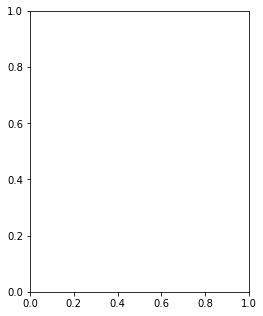

In [20]:
# Create a dictionary of columns representing the features of the dataset.
col_dict = {'maharat':1,'roshd':2,'khodpeiravi':3,'ertebatm':4,'rezayat':5,'manaviat':6,'shadi':7,'behzisti':8}

# Visualize the data for each feature using box plots.
plt.figure(figsize=(18,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(le[variable],whis=1.5)
                     plt.title(variable)

plt.show()
le.shape

In [21]:
# Remove the outliers using the interquartile range (IQR).
Q1 = le.quantile(0.25)
Q3 = le.quantile(0.75)
IQR = Q3 - Q1

le = le[~((le < (Q1 - 1.5 * IQR)) |(le > (Q3 + 1.5 * IQR))).any(axis=1)]


# Print the dimensions of the cleaned dataset.
le.shape

(151, 8)

KeyError: 'maharat'

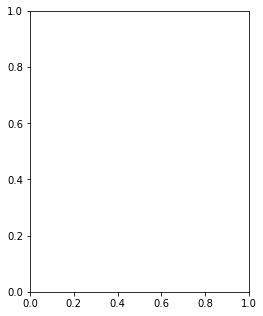

In [22]:
# Visualize the cleaned data for each feature using box plots.
plt.figure(figsize=(18,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(le[variable],whis=1.5)
                     plt.title(variable)
plt.show()

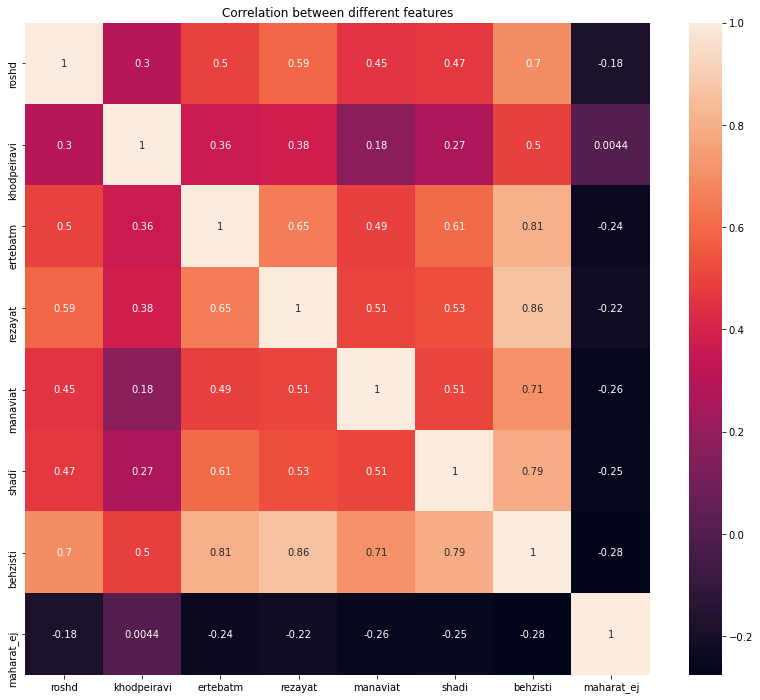

In [23]:
# Plot heatmap to visualize the correlations.
plt.figure(figsize = (14, 12))
sns.heatmap(le.corr(), annot = True)
plt.title('Correlation between different features');

### Scatter Plots

In [24]:
# # Create a vector containing all the features of the dataset.
# all_col = ['adult_mortality','infant_deaths','alcohol','percentage_expenditure','hepatitis_b','measles','bmi',
#          'under-five_deaths','polio','total_expenditure','diphtheria','hiv/aids','gdp','population','thinness_1-19_years',
#          'thinness_5-9_years','income_composition_of_resources','schooling']

# plt.figure(figsize=(15,30))

# # Plot each feature in function of the target variable (life_expectancy) using scatter plots.
# for i in range(len(all_col)):
#     plt.subplot(7,3,i+1)
#     plt.scatter(le[all_col[i]], le['life_expectancy'])
#     plt.xlabel(all_col[i])
#     plt.ylabel('Life Expectancy')

# plt.show()

## - Features Extraction

## PCA

In [25]:
# inja ham hamona ro mizarim...